In [32]:
import requests
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
hoje = pd.to_datetime("today").strftime("%d/%m/%Y")

def get_bc(codigo, data_inicial=None, data_final=hoje):
    url = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo)
    p   = {
        'dataInicial': data_inicial,
        'dataFinal'  : data_final
    }
    response = requests.get(url, params=p)
    if response.status_code == 200:
        dados = pd.DataFrame(response.json())
    else:
        print('Erro na requisição:', response.status_code)
    dados['data'] = pd.to_datetime(dados['data'], format="%d/%m/%Y")
    dados.set_index('data', inplace=True)
    dados['valor'] = pd.to_numeric(dados['valor'])
    dados
    return dados

In [3]:
ipca = get_bc(433, data_inicial='01/01/2016')
cdi  = get_bc(12,  data_inicial='01/01/2016')


In [28]:
cdi = cdi[cdi.index >= '2016']
cdi

,valor
data,
2016-01-01,1.27
2016-02-01,0.90
2016-03-01,0.43
2016-04-01,0.61
2016-05-01,0.78
...,...
2023-02-01,0.84
2023-03-01,0.71
2023-04-01,0.61


In [43]:
patrimonio = 100
patrimonio2 = 100
serie = [patrimonio]
serie2 = [patrimonio2]
mes = 1

for dia in cdi.index[:-1]:
    if mes != dia.month:
        mes = dia.month
        patrimonio  += 100
        patrimonio2 += 100
    i = cdi[cdi.index == dia]['valor'][0]
    patrimonio = patrimonio*(1+i/100)
    serie.append(patrimonio)
    serie2.append(patrimonio2)
    
patrimonio

12288.722524228968

In [44]:

len(serie)

1889

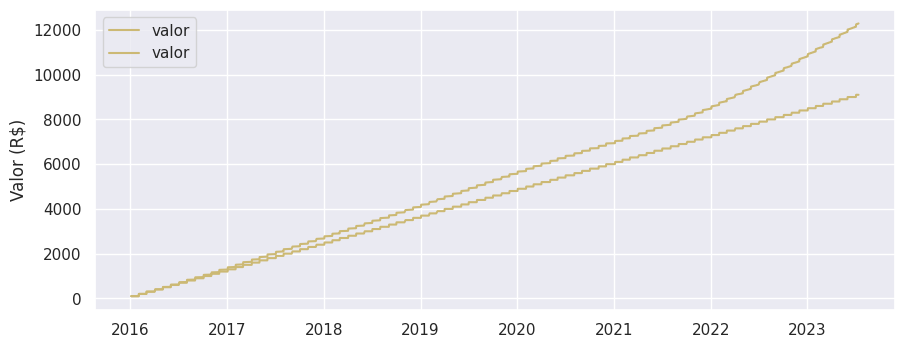

In [45]:
fig1 = plt.figure(figsize=(8,3), dpi=100)

axes1 = fig1.add_axes([0, 0, 1, 1])
axes1.plot(cdi.index, serie, 'y', label='valor')
axes1.plot(cdi.index, serie2, 'y', label='valor')
axes1.set_ylabel('Valor (R$)')
axes1.legend(loc=0)